In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Styling 

In [4]:
sns.set_theme() # apply the default theme

# Numerical Plots

* Distribution: Histogram, KDE(Kernel Density Estimate), Displot
* Bar Plot
* Count Plot 
* Facet Plot: Tạo ra một lưới 2d các bảng được xác định bởi các biến tạo thành các hàng và cột
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* Join Plot
* Pair Plot
* Heat Map: Một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

## Distribution Plot

In [5]:
tip_df = sns.load_dataset("tips")

In [6]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


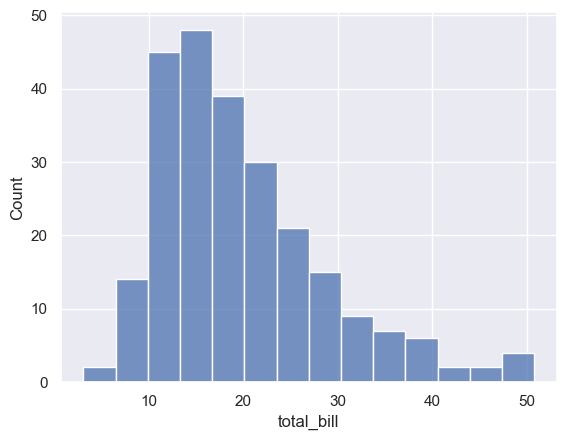

In [7]:
sns.histplot(data=tip_df["total_bill"]);

# KDE Plot

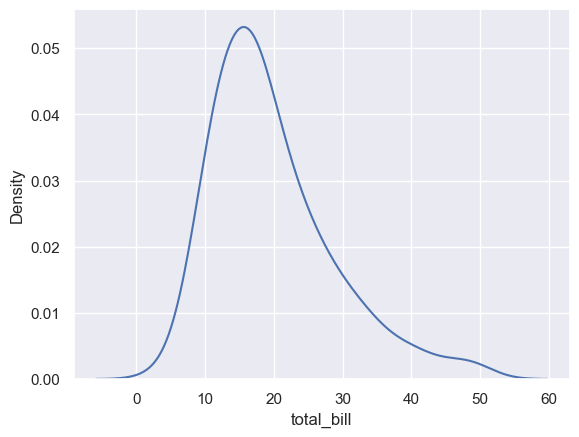

In [8]:
sns.kdeplot(data=tip_df["total_bill"]);

## Displot

D:\Anacoda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


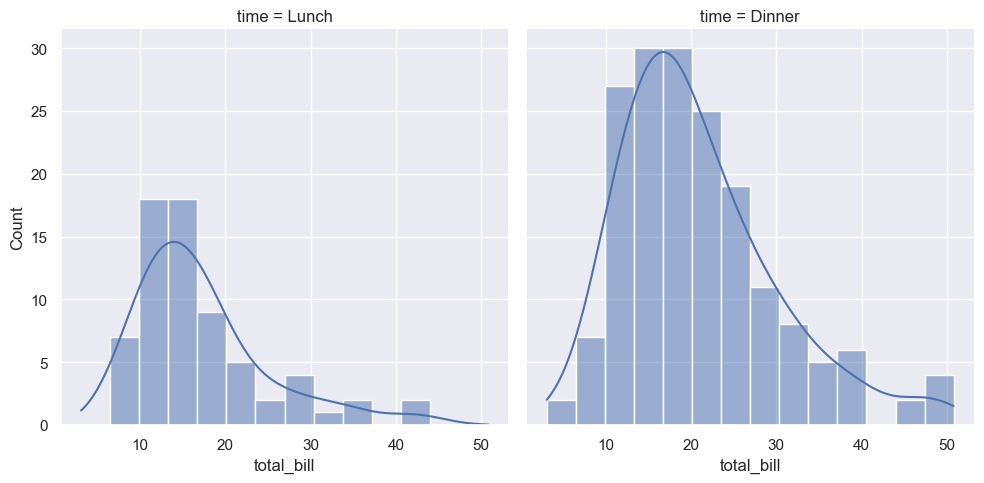

In [9]:
sns.displot(data=tip_df, x = "total_bill",col = "time", kde = True);

# Categorical Plots

## Bar Plost

In [10]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


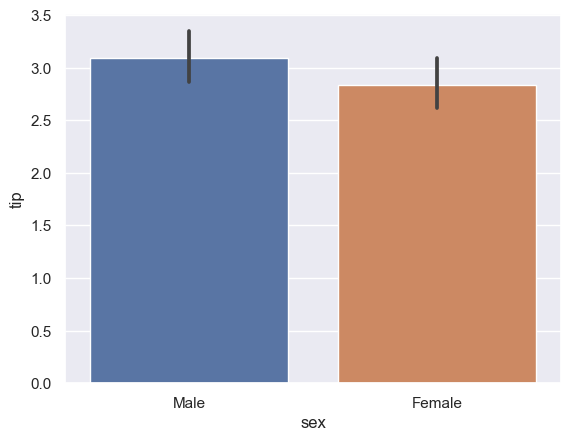

In [11]:
sns.barplot(data = tip_df, x="sex",y="tip",estimator=np.mean);

# Count Plot 

In [12]:
tip_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

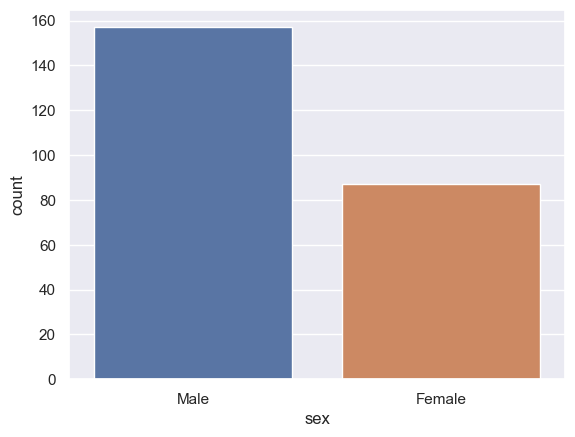

In [13]:
sns.countplot(data = tip_df , x = "sex");

# Box Plot 


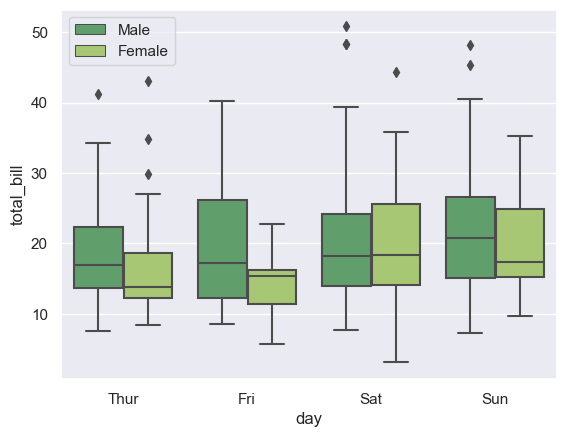

In [14]:
sns.boxplot(data = tip_df, x = "day", y = "total_bill", hue = "sex" , palette= "summer");

plt.legend(loc = 0);

# Fecet Grid

D:\Anacoda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


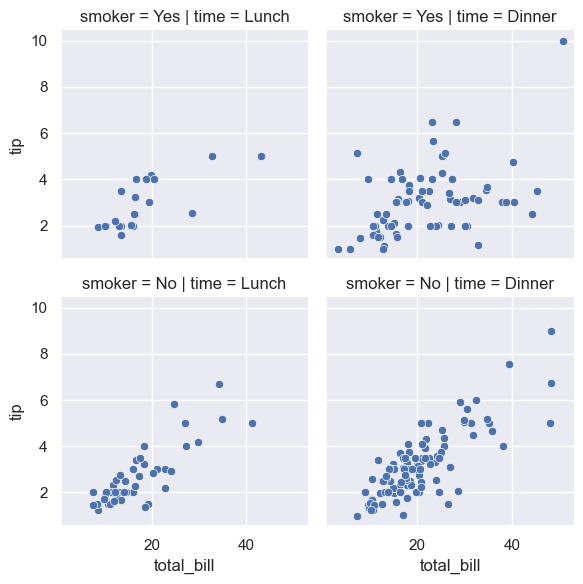

In [15]:

tips_fg = sns.FacetGrid(data = tip_df, row = "smoker", col = "time" )# Create a class instance of facet Grid class
tips_fg.map(sns.scatterplot,"total_bill","tip");

D:\Anacoda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


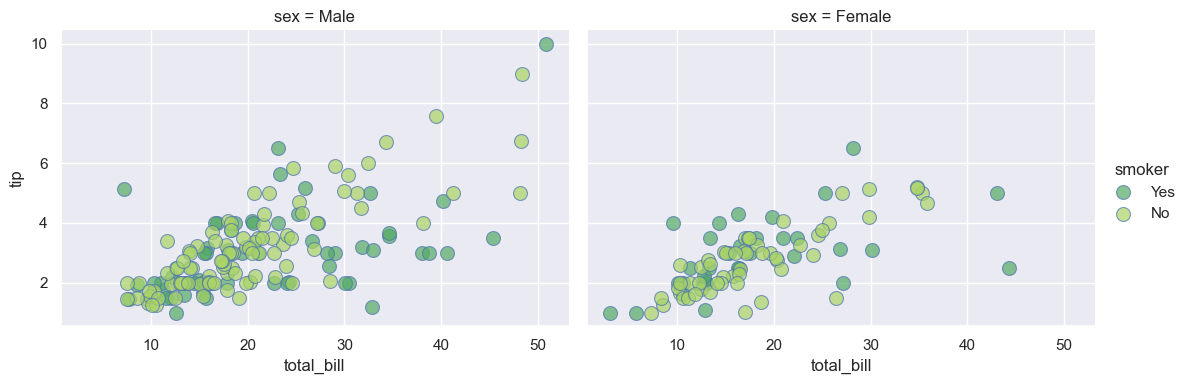

In [22]:
kws = dict(s=100,edgecolor="b",alpha=0.7)

new_fg = sns.FacetGrid(data = tip_df,col="sex", 
                      hue="smoker",palette="summer",
                      height=4,aspect=1.4)

new_fg.map(sns.scatterplot,"total_bill","tip",**kws);

new_fg.add_legend();


# Joint Plot 

In [24]:
# New Data 'penguins'
penguisn_df = sns.load_dataset('penguins')
penguisn_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


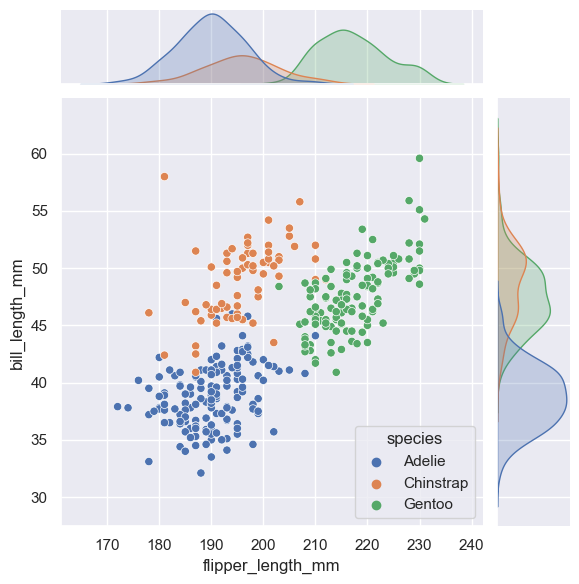

In [25]:
sns.jointplot(data = penguisn_df, x="flipper_length_mm",y="bill_length_mm",hue="species");

# Pair Plots

D:\Anacoda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


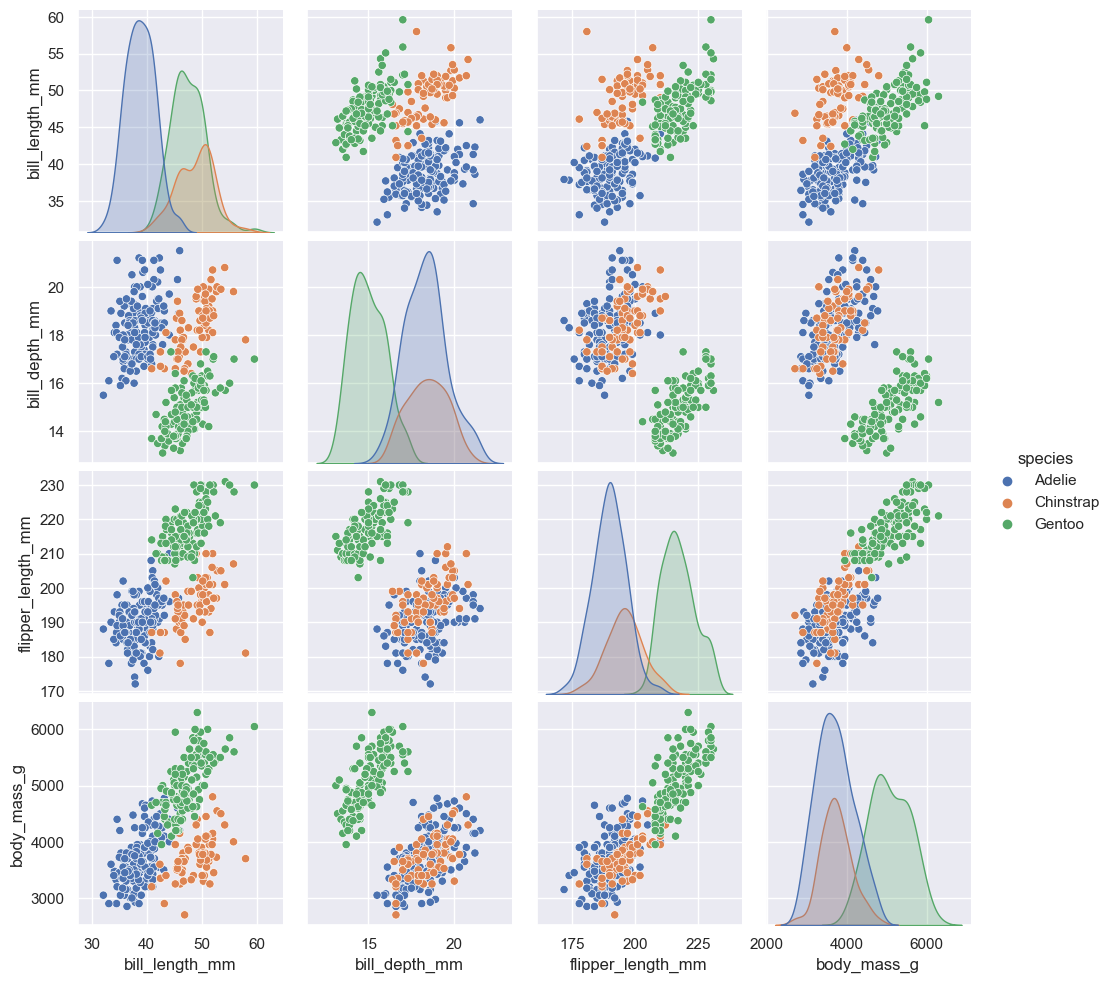

In [27]:
sns.pairplot(data = penguisn_df,hue = "species");

# Heatmaps

In [30]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
flights = pd.pivot_table(flights_df,index="month",columns="year",values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


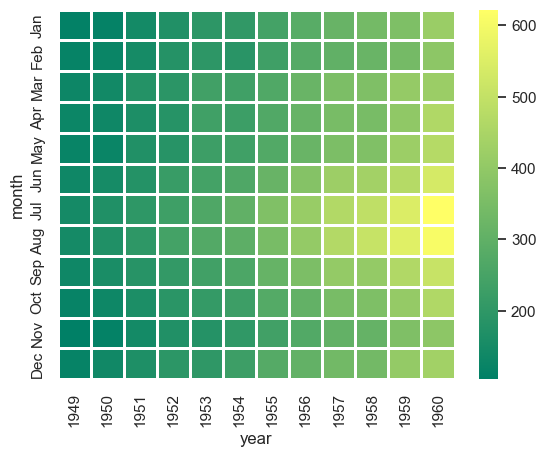

In [37]:
sns.heatmap(data = flights,cmap = "summer",linecolor="white",linewidths=1);